In [35]:
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as img

In [36]:
dataset_path = "dataset/house_type_dataset_1200.csv"
distance_metric = "e" # m or e
k = 3

x_new = np.array([
    120,  # Area
    3,    # Rooms
    10,   # BuildingAge
    5.0,  # DistanceToCenter
    4,    # Floor
    1,    # HasElevator
    1    # HasParking
])

In [37]:
df = pd.read_csv(dataset_path)
df.head()

,Area,Rooms,BuildingAge,DistanceToCenter,Floor,HasElevator,HasParking,TypeCategory
0,127,3,0,9.6,5,1,1,4
1,105,3,20,14.5,5,1,1,2
2,132,3,60,3.3,1,0,1,3
3,163,4,18,2.1,5,1,1,4
4,101,2,34,13.2,3,1,1,1


In [38]:
dataset_array = df.to_numpy()
x = dataset_array[:, :len(df.columns)-1] # features
y = dataset_array[:, -1] # lables

In [39]:
labels_name = {
    0: "Economy",
    1: "Lower-Mid",
    2: "Mid",
    3: "Upper-Mid",
    4: "Luxury"
}

In [40]:
def dimension_test(X, x_new):
    assert X.shape[1] == x_new.shape[0]

In [41]:
# Feature scaling is mandatory for KNN.
def standardize(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0, ddof=0)
    return (X - mean) / (std + 1e-8)

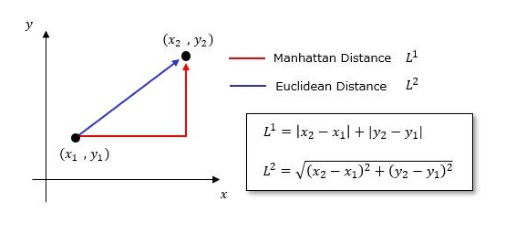

In [42]:
def euclidean(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

def manhattan_distance(a, b):
    return np.sum(np.abs(a - b))

img1 = img.imread("euclidean-vs-manhattan-image-by-pawan-yadav.jpg")
plt.axis("off")
plt.imshow(img1)

In [43]:
def knn_predict(X_train, y_train, x_new, k):
    distances = []

    for x, y in zip(X_train, y_train):
        if distance_metric == 'e':
            d = euclidean(x, x_new)
        else:
            d = manhattan_distance(x, x_new)

        distances.append((d, y))

    distances.sort(key=lambda x: x[0])
    k_nearest = distances[:k]

    labels = [label for _, label in k_nearest]
    return max(set(labels), key=labels.count)

In [44]:
X = standardize(x)
# dimension_test(X, x_new)
y_pred = knn_predict(X, y, x_new, k)
y_pred_label = labels_name.get(y_pred)
print(f"{y_pred}: this is a/an {y_pred_label} house!")

4.0: this is a/an Luxury house!
